Exploratory Data Analysis

The exploratory data analysis (EDA) for this project focuses on understanding the key factors contributing to the severity of traffic crashes in Chicago. By examining variables such as weather conditions, speed limits, road direction, road condition, and traffic way type, we aim to uncover patterns and relationships that influence crash severity.

Import - Libraries: will help to use the modules that contain functions, and methods

In [67]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

Data Collection: Data collection is the process of gathering information from various formatted types. Here, the data is in CSV file.

In [68]:
#loading the data 'Car Crashes Chicago in 2022' from the CSV file to the variable "Car_crash"
#using the method 'read_csv'
Car_crash = pd.read_csv('Car Crashes - Chicago in 2022 .csv')

In [69]:
#To see the sample of five rows, use .head() method.
Car_crash.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,359bf9f5872d646bb63576e55b1e0b480dc93c2b935ab5...,NaN,01/31/22,25,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,REAR END,ONE-WAY,...,0.0,0.0,5.0,0.0,19,2,1,NaN,NaN,NaN
1,36360857c079418cba1b1d70cf653595bbfb4566de8fcb...,Y,01/01/22,10,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,PARKING LOT,...,0.0,0.0,2.0,0.0,16,7,1,NaN,NaN,NaN
2,4a474e553cbf4d17eeb20981bf2c03572ac566cf1ba3a2...,NaN,01/30/22,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,ONE-WAY,...,0.0,0.0,2.0,0.0,8,1,1,NaN,NaN,NaN
3,8a4c06bd70d219f56aaf602db8bdb4e11e0d0825cfc8ac...,NaN,05/28/22,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,...,0.0,0.0,2.0,0.0,17,7,5,NaN,NaN,NaN
4,9bcf6196e48e1d1246507609659e37d210ac45ed650d6b...,NaN,04/16/22,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,11,7,4,NaN,NaN,NaN


In [70]:
#loading cleaned and saved 'Car Crashes Chicago in 2022' data into the new dataframe 
Cleaned_Crashes_data = pd.read_csv('Car_Carshes_cleaned.csv')

In [71]:
#using info() method to see the columns, Non-null counts, and dtype
Cleaned_Crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42972 entries, 0 to 42971
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CRASH_DATE            42972 non-null  object
 1   POSTED_SPEED_LIMIT    42972 non-null  int64 
 2   WEATHER_CONDITION     42972 non-null  object
 3   TRAFFICWAY_TYPE       42972 non-null  object
 4   ROADWAY_SURFACE_COND  42972 non-null  object
 5   STREET_DIRECTION      42972 non-null  object
 6   MOST_SEVERE_INJURY    42972 non-null  object
 7   CRASH_HOUR            42972 non-null  int64 
 8   CRASH_DAY_OF_WEEK     42972 non-null  int64 
 9   CRASH_MONTH           42972 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 3.3+ MB


In [72]:
#To see the sample of five rows, use .head() method.
Cleaned_Crashes_data.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,STREET_DIRECTION,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,01/31/22,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,19,2,1
1,01/01/22,10,SNOW,PARKING LOT,SNOW OR SLUSH,W,NO INDICATION OF INJURY,16,7,1
2,01/30/22,25,CLEAR,ONE-WAY,SNOW OR SLUSH,W,NO INDICATION OF INJURY,8,1,1
3,05/28/22,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,17,7,5
4,04/16/22,10,CLEAR,PARKING LOT,DRY,W,NO INDICATION OF INJURY,11,7,4


Exploring the Data: 
Now, explore columns that are key insights to predict the "Most Severe Injury"

In [73]:
#checking null values in 'CRASH_DATE'
missing_dates = Cleaned_Crashes_data['CRASH_DATE'].isnull()
missing_count = missing_dates.sum()

In [74]:
print(missing_count)

0


In [75]:
# To see no. of unique entry values in 'CRASH_DATE' 
print(Cleaned_Crashes_data['CRASH_DATE'].unique())

['01/31/22' '01/01/22' '01/30/22' '05/28/22' '04/16/22' '04/12/22'
 '03/05/22' '04/04/22' '03/20/22' '02/08/22' '04/30/22' '05/05/22'
 '02/23/22' '03/14/22' '04/09/22' '01/23/22' '05/30/22' '01/21/22'
 '05/26/22' '04/27/22' '01/24/22' '04/05/22' '01/28/22' '04/23/22'
 '03/21/22' '03/19/22' '04/28/22' '05/16/22' '05/17/22' '01/03/22'
 '03/16/22' '03/11/22' '05/06/22' '05/18/22' '02/02/22' '03/01/22'
 '04/11/22' '05/25/22' '03/15/22' '04/25/22' '02/07/22' '02/22/22'
 '01/06/22' '02/14/22' '03/26/22' '02/04/22' '01/16/22' '01/13/22'
 '03/22/22' '03/12/22' '04/21/22' '05/12/22' '03/24/22' '02/11/22'
 '04/14/22' '03/18/22' '05/08/22' '03/13/22' '02/18/22' '02/24/22'
 '01/26/22' '05/11/22' '01/19/22' '01/10/22' '05/23/22' '05/29/22'
 '01/12/22' '04/24/22' '02/05/22' '03/07/22' '01/15/22' '02/01/22'
 '01/22/22' '03/08/22' '01/02/22' '04/22/22' '01/09/22' '03/29/22'
 '05/09/22' '04/07/22' '01/29/22' '04/18/22' '02/21/22' '05/02/22'
 '03/17/22' '04/17/22' '01/14/22' '03/23/22' '02/26/22' '01/11

Here, got an invalid entry for the date, which is '#REF!'

In [76]:
Cleaned_Crashes_data['CRASH_DATE'] = pd.to_datetime(Cleaned_Crashes_data['CRASH_DATE'], errors='coerce')

# Check for rows with invalid dates
invalid_dates = Cleaned_Crashes_data[Cleaned_Crashes_data['CRASH_DATE'].isnull()]
print(invalid_dates)

      CRASH_DATE  POSTED_SPEED_LIMIT WEATHER_CONDITION  \
5201         NaT                  30             CLEAR   
5202         NaT                  30             CLEAR   
5203         NaT                  30              RAIN   
5204         NaT                  20             CLEAR   
5205         NaT                  20             CLEAR   
...          ...                 ...               ...   
42967        NaT                  30             CLEAR   
42968        NaT                  30             CLEAR   
42969        NaT                  30             CLEAR   
42970        NaT                  30             CLEAR   
42971        NaT                  30             CLEAR   

                       TRAFFICWAY_TYPE ROADWAY_SURFACE_COND STREET_DIRECTION  \
5201                       NOT DIVIDED                  DRY                W   
5202                           ONE-WAY                  WET                S   
5203                       NOT DIVIDED                  WET    

C:\Users\mercy\AppData\Local\Temp\ipykernel_20376\1333388292.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Cleaned_Crashes_data['CRASH_DATE'] = pd.to_datetime(Cleaned_Crashes_data['CRASH_DATE'], errors='coerce')


In [77]:
Cleaned_Crashes_data = Cleaned_Crashes_data.dropna(subset=['CRASH_DATE'])

In [78]:
Cleaned_Crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5201 entries, 0 to 5200
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CRASH_DATE            5201 non-null   datetime64[ns]
 1   POSTED_SPEED_LIMIT    5201 non-null   int64         
 2   WEATHER_CONDITION     5201 non-null   object        
 3   TRAFFICWAY_TYPE       5201 non-null   object        
 4   ROADWAY_SURFACE_COND  5201 non-null   object        
 5   STREET_DIRECTION      5201 non-null   object        
 6   MOST_SEVERE_INJURY    5201 non-null   object        
 7   CRASH_HOUR            5201 non-null   int64         
 8   CRASH_DAY_OF_WEEK     5201 non-null   int64         
 9   CRASH_MONTH           5201 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 447.0+ KB


In [79]:
Cleaned_Crashes_data.shape

(5201, 10)

After removing the invalid dates from the 'CRASH_DATE' columns, the 'Cleaned_Crashes_data' data frame has 5201 rows and 10 columns.

In [80]:
Cleaned_Crashes_data.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,STREET_DIRECTION,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,2022-01-31,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,19,2,1
1,2022-01-01,10,SNOW,PARKING LOT,SNOW OR SLUSH,W,NO INDICATION OF INJURY,16,7,1
2,2022-01-30,25,CLEAR,ONE-WAY,SNOW OR SLUSH,W,NO INDICATION OF INJURY,8,1,1
3,2022-05-28,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,17,7,5
4,2022-04-16,10,CLEAR,PARKING LOT,DRY,W,NO INDICATION OF INJURY,11,7,4


Set up a new index 'CRASH_DATE' to the Cleaned_Crashes_data  

In [81]:
# using .set_index() function to setup the index
Newindex_set = Cleaned_Crashes_data.set_index('CRASH_DATE')

In [82]:
# To see the sample 
Newindex_set.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,STREET_DIRECTION,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
CRASH_DATE,,,,,,,,,
2022-01-31,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,19,2,1
2022-01-01,10,SNOW,PARKING LOT,SNOW OR SLUSH,W,NO INDICATION OF INJURY,16,7,1
2022-01-30,25,CLEAR,ONE-WAY,SNOW OR SLUSH,W,NO INDICATION OF INJURY,8,1,1
2022-05-28,25,CLEAR,ONE-WAY,DRY,W,NO INDICATION OF INJURY,17,7,5
2022-04-16,10,CLEAR,PARKING LOT,DRY,W,NO INDICATION OF INJURY,11,7,4


'CRASH_DATE' sort by the 'POSTED_SPEED_LIMIT' values in a ascending order, using .sort_values() function.

In [83]:
#sorting dates using .sort_values()function
Newindex_set.POSTED_SPEED_LIMIT.sort_values(ascending=False).head()

CRASH_DATE
2022-04-08    60
2022-03-21    55
2022-02-17    55
2022-01-09    55
2022-03-22    55
Name: POSTED_SPEED_LIMIT, dtype: int64

In [84]:
Newindex_set.CRASH_DAY_OF_WEEK.sort_values(ascending=False).head()

CRASH_DATE
2022-03-26    7
2022-02-26    7
2022-01-22    7
2022-03-19    7
2022-03-19    7
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [85]:
Newindex_set.CRASH_MONTH.sort_values().head()

CRASH_DATE
2022-01-31    1
2022-01-10    1
2022-01-06    1
2022-01-21    1
2022-01-09    1
Name: CRASH_MONTH, dtype: int64

Visualization: 
To visualize the relationship between the data, Plotting 

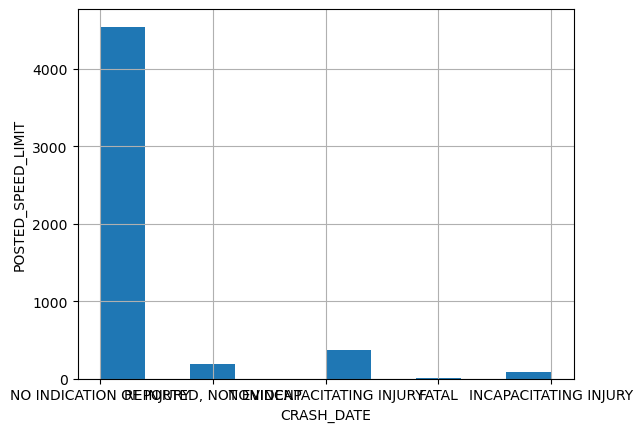

In [86]:
# making plots using .hist()method
Newindex_set.MOST_SEVERE_INJURY.hist(bins=10)
plt.xlabel('CRASH_DATE')
plt.ylabel('POSTED_SPEED_LIMIT');

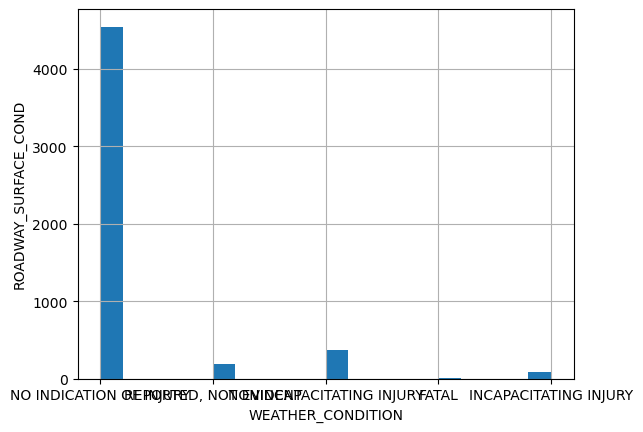

In [87]:
Newindex_set.MOST_SEVERE_INJURY.hist(bins=20)
plt.xlabel('WEATHER_CONDITION')
plt.ylabel('ROADWAY_SURFACE_COND');

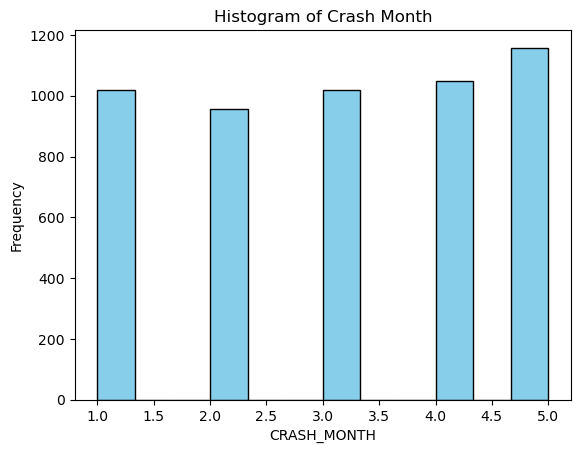

In [88]:
# Histogram for CRASH MONTH
plt.hist(Newindex_set['CRASH_MONTH'], bins=12, color='skyblue', edgecolor='black')
plt.title('Histogram of Crash Month')
plt.xlabel('CRASH_MONTH')
plt.ylabel('Frequency')
plt.show()

According to this above histogram, May month had more car crashes compare to all other months in this dataframe.

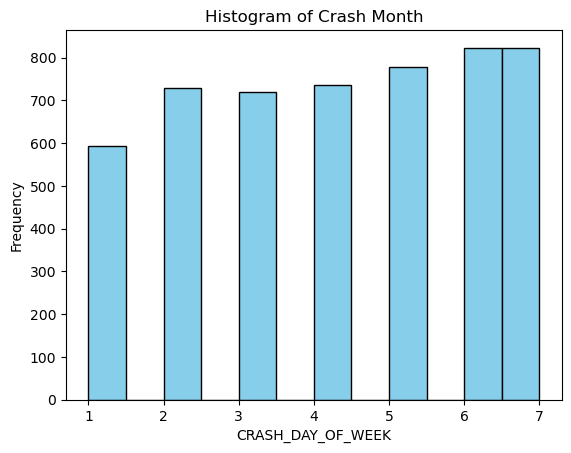

In [89]:
# Histogram for CRASH_DAY_OF_WEEK
plt.hist(Newindex_set['CRASH_DAY_OF_WEEK'], bins=12, color='skyblue', edgecolor='black')
plt.title('Histogram of Crash Month')
plt.xlabel('CRASH_DAY_OF_WEEK')
plt.ylabel('Frequency')
plt.show()

According to this histogram 6th and 7th days of the week had more car crashes compared to all other days of the week

Mean and Standard Deviation for the Numerical columns.
There are three Numerical columns in this data frame: 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', POSTED_SPEED_LIMIT'

In [90]:
#std for 'CRASH_DAY_OF_WEEK'
std_days = Newindex_set['CRASH_DAY_OF_WEEK'].std()
print(std_days)

1.9752481460913998


In [91]:
# mean for 'CRASH_DAY_OF_WEEK'
mean_days = Newindex_set['CRASH_DAY_OF_WEEK'].mean()
print(mean_days)

4.17900403768506


In [92]:
# std for 'CRASH_MONTH'
std_months = Newindex_set['CRASH_MONTH'].std()
print(std_months)

1.4333329865122237


In [93]:
# mean for 'CRASH_MONTH'
mean_months = Newindex_set['CRASH_MONTH'].mean()
print(mean_months)

3.071909248221496


In [94]:
# std for 'POSTED_SPEED_LIMIT'
std_speed = Newindex_set['POSTED_SPEED_LIMIT'].std()
print(std_speed)

6.302994620719741


In [95]:
# mean for 'POSTED_SPEED_LIMIT'
mean_speed = Newindex_set['POSTED_SPEED_LIMIT'].mean()
print(mean_speed)

28.15362430301865


In [ ]:
Calculate the PCA transformation:
Fit the PCA transformation using the scaled data.

In [96]:
# Scaling numerical columns
Crash_num_columns = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK',	'CRASH_MONTH'] 



In [97]:
# Scale the data using fit_transform function
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Newindex_set[Crash_num_columns])



In [100]:
# Apply PCA
pca = PCA()
pca.fit(data_scaled)

print(data_scaled)


[[ 1.06461514 -1.10326065 -1.44565742]
 [ 0.53205158  1.42831026 -1.44565742]
 [-0.88811791 -1.60957483 -1.44565742]
 ...
 [-0.35555435 -0.09063228 -1.44565742]
 [-1.77572385 -1.60957483 -0.74791575]
 [ 0.70957276  0.4156819  -0.05017408]]


In [101]:
data_scaled.shape

(5201, 3)

In [102]:
print(data_scaled[0, 0])

1.064615137411154


In [103]:
Crash_analyzed = Newindex_set

In [104]:
Crash_analyzed.shape

(5201, 9)

Data Saving: Data saving is the final step in this EDA process. Save this cleaned data in the 'datapath' using the .to_csv method from pandas.

In [105]:
datapath = Crash_analyzed.to_csv('Crash_analyzed.csv', index=False)